In [2]:
import jax
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt

In [3]:
key = jr.PRNGKey(4)

# First test case

We define the function $f:\mathbb{R} \rightarrow \mathbb{R}$, $f(x) = 2\sin(x) + 0.1x^2$.

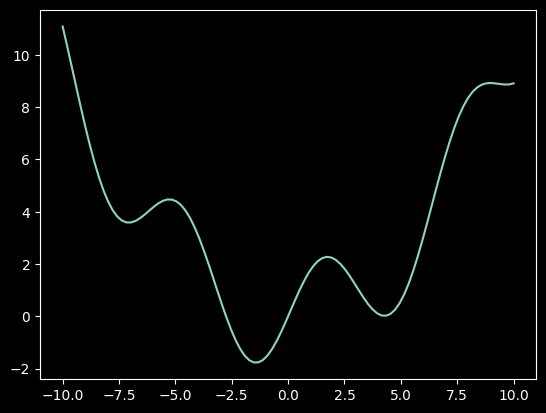

In [4]:
x = jnp.linspace(-10, 10, 100)
def f_mean(x): return 2 * jnp.sin(x) + 0.1 * x ** 2

plt.plot(x, f_mean(x));

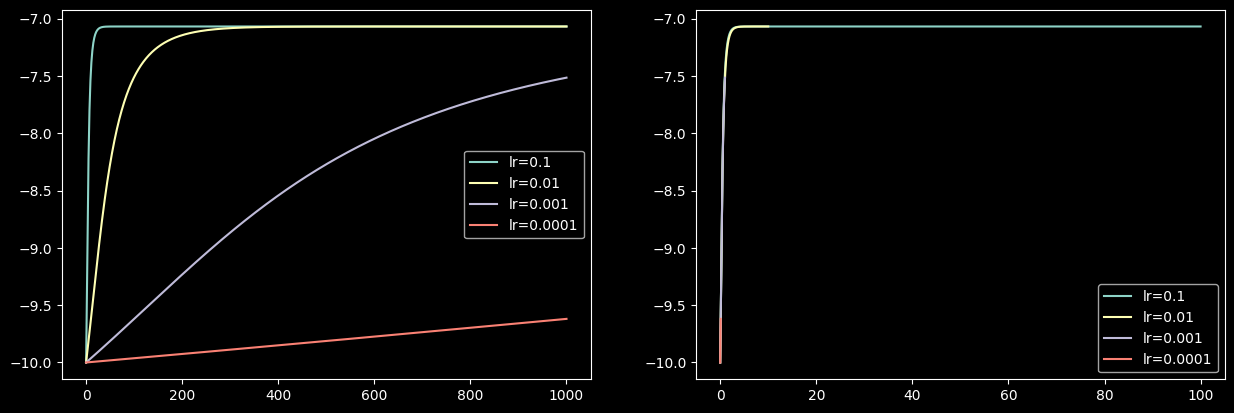

In [18]:
@jax.jit
def update(x, learning_rate):
    dx = jax.grad(f_mean)(x)
    x += - learning_rate * dx
    return x

fig, axes = plt.subplots(1,2)
fig.set_figwidth(15)

learning_rates = [0.1, 0.01, 0.001, 0.0001]
max_iter = 1000
for learning_rate in learning_rates:
    x_gd = -10.0
    iterates = [x_gd]
    for _ in range(max_iter):
        x_gd = update(x_gd, learning_rate)
        iterates.append(x_gd)
    t = jnp.linspace(0,max_iter * learning_rate, max_iter+1)
    axes[0].plot(iterates, label=f'lr={learning_rate}')
    axes[1].plot(t, iterates, label=f'lr={learning_rate}')
for ax in axes:
    ax.legend()

# Second test case
We define the function $f(x,y) = (x-1)^2 + 100(y-x^2)^2$

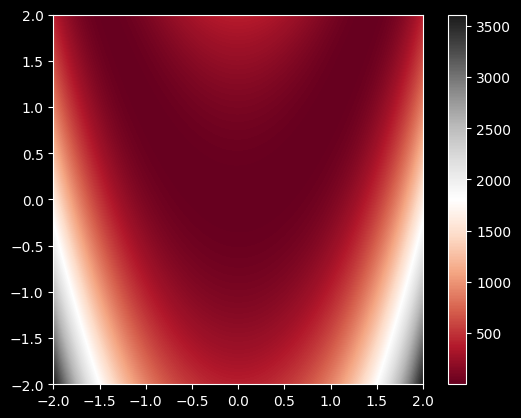

In [63]:
def g(x, y): return (x-1) ** 2 + 100 * (y-x**2)**2

x = jnp.linspace(-2,2,1000)
y = x.copy()

X, Y = jnp.meshgrid(x,y)

Z = g(X, Y)
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# plt.contour(X,Y,Z, 100, cmap='RdGy')

plt.imshow(Z, extent=[-2, 2, -2, 2], origin='lower',
           cmap='RdGy')
plt.colorbar();

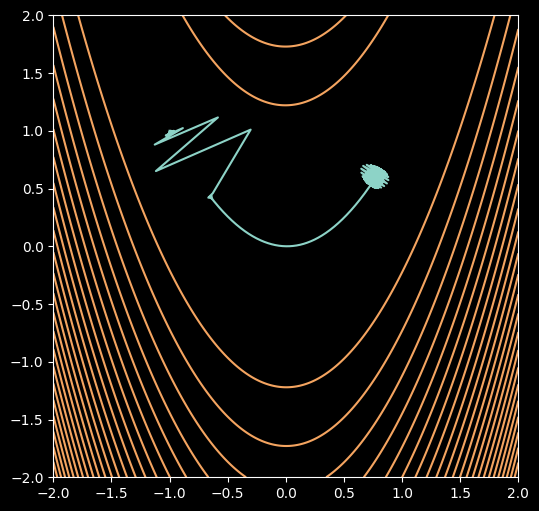

In [74]:
fig, ax = plt.subplots(figsize=(6, 6))
cg1 = ax.contour(X, Y, Z, 30, colors='sandybrown')
ax.plot(iterates[:,0], iterates[:,1])

(20, 20)


Text(0, 0.5, '$y$')

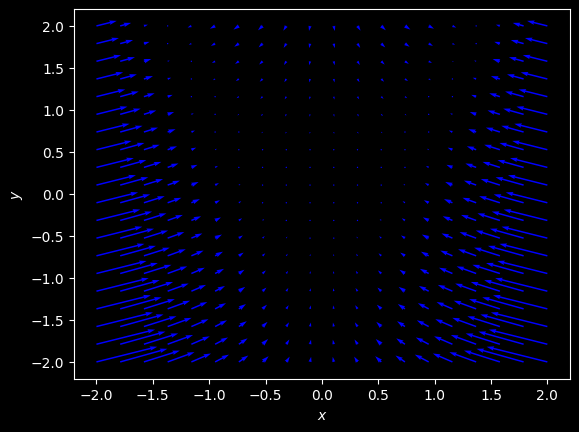

In [58]:
from functools import partial
x = jnp.linspace(-2, 2, 20)
y = x.copy()
X, Y = jnp.meshgrid(x, y)

print(X.shape)


def g(x, y): return (x-1) ** 2 + 100 * (y-x**2)**2

@partial(jax.jit)
def grid_gradients(X, Y):
    return jax.vmap(jax.vmap(jax.grad(
        g, argnums=(0,1)), in_axes=(0, 0)), in_axes=(0, 0))(X, Y)


dX, dY = grid_gradients(X, Y)
plt.quiver(X, Y, -dX, -dY, color='b')
plt.xlabel('$x$')
plt.ylabel('$y$')


0.003
[-1.  1.]
[-0.628594    0.45900452]
[-0.61734813  0.38922542]
[-0.5780648   0.34196398]
[-0.53650063  0.29549536]
[-0.4925037   0.25002408]
[-0.44580823  0.20593524]
[-0.396152    0.16375065]
[-0.34331846  0.12417017]
[-0.28721458  0.08810951]
[-0.22799747  0.05670751]
[-0.16624331  0.03125213]
[-0.10309457  0.01296057]
[-0.04024322  0.00260644]
[0.02038048 0.00014994]
[0.07712736 0.00465357]
[0.12902674 0.01459795]
[0.17582887 0.02836444]
[0.21778525 0.04457536]
[0.25538903 0.06220463]
[0.28919628 0.0805452 ]
[0.3197346  0.09913111]
[0.34746817 0.11766355]
[0.37279147 0.1359551 ]
[0.39603448 0.15389134]
[0.41747186 0.17140517]
[0.4373324 0.1884604]
[0.4558072  0.20504072]
[0.47305685 0.22114272]
[0.48921692 0.23677126]
[0.5044029 0.2519364]
[0.5187133  0.26665133]
[0.53223306 0.280931  ]
[0.5450358 0.2947913]
[0.55718535 0.30824858]
[0.5687379  0.32131892]
[0.5797427  0.33401814]
[0.5902432  0.34636152]
[0.6002782 0.3583639]
[0.609882   0.37003925]
[0.6190855  0.38140112]
[0.627

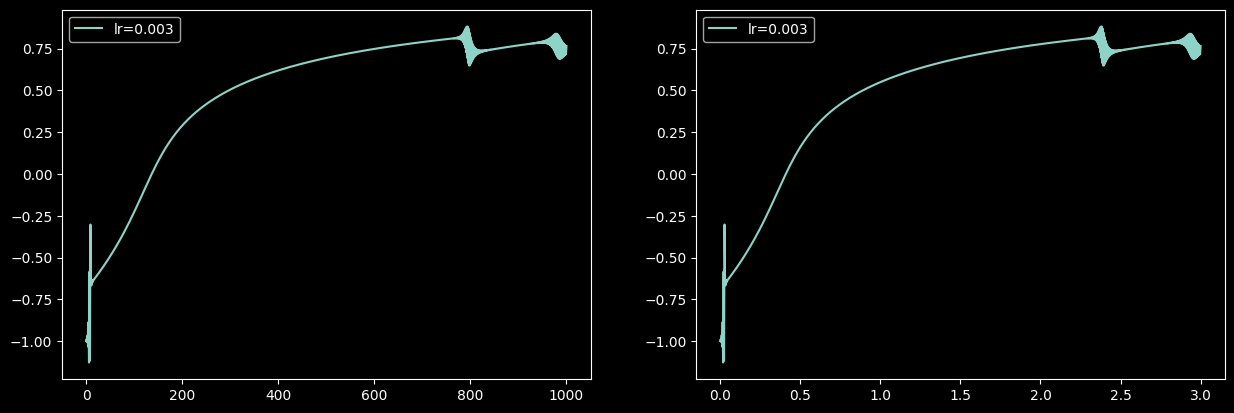

In [73]:
def g(x): return (x[0]-1) ** 2 + 100 * (x[1]-x[0]**2)**2

@jax.jit
def update_g(x, learning_rate):
    dx = jax.grad(g)(x)
    x += - learning_rate * dx
    return x


fig, axes = plt.subplots(1, 2)
fig.set_figwidth(15)

learning_rates = [0.003]
max_iter = 1000
for learning_rate in learning_rates:
    x_gd = jnp.array([-1.0, 1.0])
    iterates = [x_gd.copy()]
    # print(x_gd)
    print(learning_rate)
    for i in range(max_iter):
        if i % 10 == 0:
            print(x_gd)
        x_gd = update_g(x_gd, learning_rate)
        iterates.append(x_gd)
    iterates = jnp.array(iterates)
    t = jnp.linspace(0, max_iter * learning_rate, max_iter+1)
    axes[0].plot(iterates[:,0], label=f'lr={learning_rate}')
    axes[1].plot(t, iterates[:,0], label=f'lr={learning_rate}')
for ax in axes:
    ax.legend()
